In [4]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC

In [5]:
from sklearn.datasets import load_iris

In [8]:
iris = load_iris()

In [9]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
x = iris.data
y = iris.target

### 取 petal length 及 petal width

In [12]:
X = x[:,2:4]
Y = y

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,
                                                   random_state = 0)

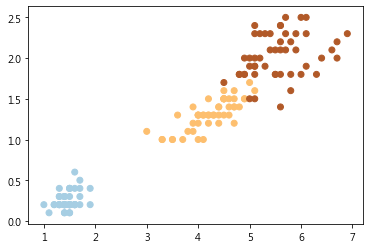

In [22]:
plt.scatter(X[:,0], X[:,1], c = Y, cmap = 'Paired')

### step 1. 開一台函數學習機

In [23]:
clf = SVC(gamma = 'auto')

### step 2. 訓練

In [24]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### step 3. 預測

In [25]:
y_predict = clf.predict(x_test)

In [26]:
y_predict - y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0])

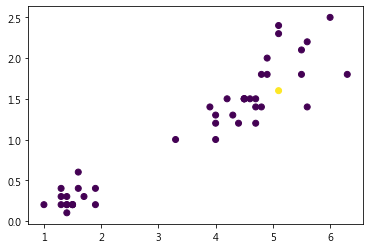

In [27]:
plt.scatter(x_test[:,0], x_test[:,1], c = y_predict - y_test)

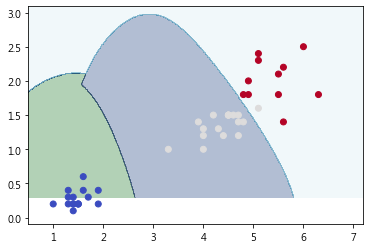

In [31]:
x0 = np.arange(0.5,7.2,0.01)
y0 = np.arange(0.3,3.1,0.01)

xm, ym = np.meshgrid(x0,y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, cmap = 'ocean', alpha = 0.3)
plt.scatter(x_test[:,0], x_test[:,1], cmap = 'coolwarm', c = y_test)
             